<a href="https://colab.research.google.com/github/stevengregori92/DimensionalityReduction/blob/main/Feature_Extraction_on_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF

In [ ]:
!gdown https://drive.google.com/uc?id=13HP6N9TAp5fLC7dPIEDyjHEgYZgtlqMN

Downloading...
From: https://drive.google.com/uc?id=13HP6N9TAp5fLC7dPIEDyjHEgYZgtlqMN
To: /content/dataaaa.zip
100% 24.9M/24.9M [00:00<00:00, 37.9MB/s]


In [ ]:
!unzip /content/dataaaa.zip

Archive:  /content/dataaaa.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/lfw_people.csv     
  inflating: data/small_fmnist.csv   
  inflating: data/breast_cancer.csv  
  inflating: data/kompas.csv         
  inflating: __MACOSX/data/._kompas.csv  
   creating: data/sample_faces/
  inflating: data/sample_faces/.DS_Store  
   creating: __MACOSX/data/sample_faces/
  inflating: __MACOSX/data/sample_faces/._.DS_Store  
  inflating: data/sample_faces/hatta.png  
  inflating: data/sample_faces/soekarno2.png  
  inflating: data/sample_faces/soekarno1.png  


In [ ]:
df = pd.read_csv('data/lfw_people.csv')
df

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,110,128,145,152,148,155,164,175,186,192,...,39,27,15,11,12,12,14,14,13,Igor Ivanov
3019,44,58,88,106,110,115,113,117,127,131,...,220,227,227,226,220,212,207,203,200,George W Bush
3020,77,90,93,76,64,84,114,124,122,121,...,248,251,250,249,248,241,233,234,230,George W Bush
3021,87,71,63,55,56,74,109,144,163,167,...,81,89,97,95,90,96,96,92,96,Gerhard Schroeder


#Dataset Splitting

In [ ]:
X = df.drop(columns=['name']).values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

#Visualize Dataset

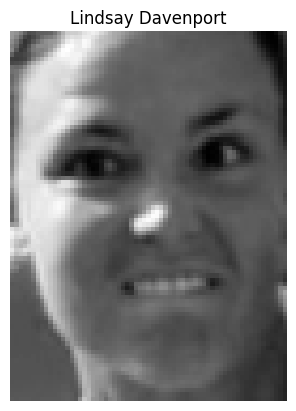

In [ ]:
idx=7
plt.imshow(X_train[idx].reshape(87,65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off');

#Decide n_components

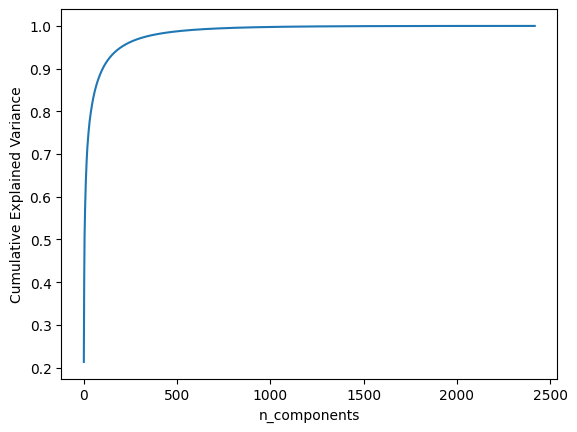

In [ ]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance');

#Feature Extraction melalui Dim Reduction

In [ ]:
pca = PCA(250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_train_pca.shape)
print(pca.components_.shape)

(2418, 5655)
(2418, 250)
(250, 5655)


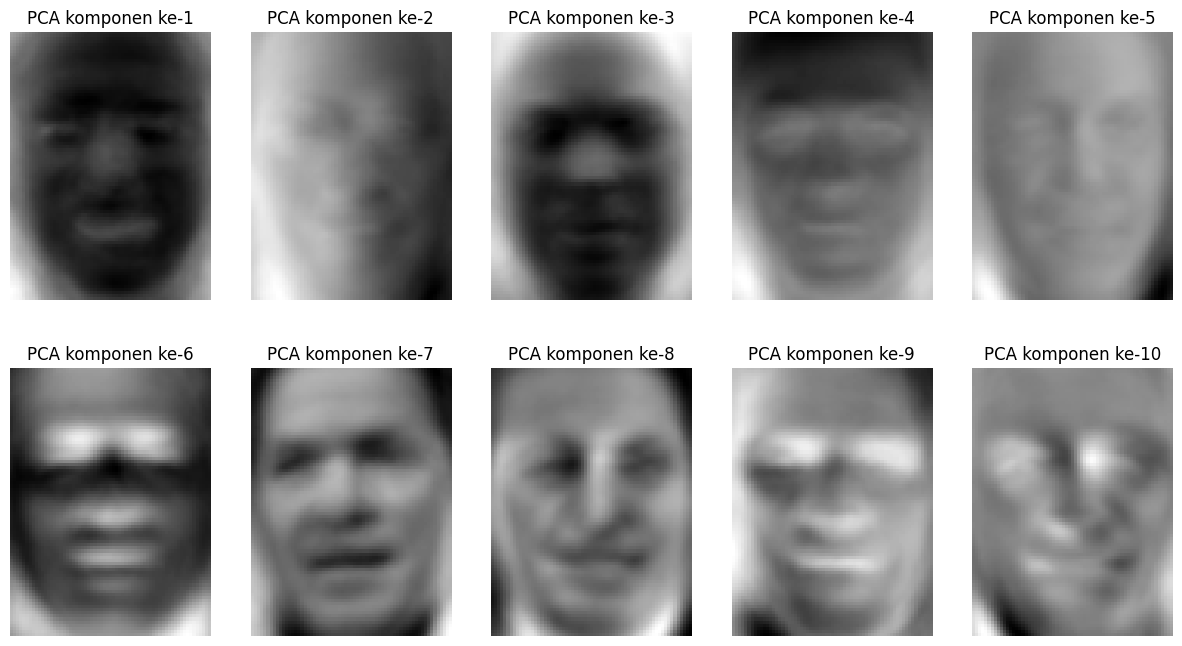

In [ ]:
plt.figure(figsize=(15,8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(pca.components_[i].reshape(87,65), cmap='gray')
  plt.title(f'PCA komponen ke-{i+1}')
  plt.axis('off');

#Reconstuct Image

In [ ]:
X_train_inv = pca.inverse_transform(X_train_pca)

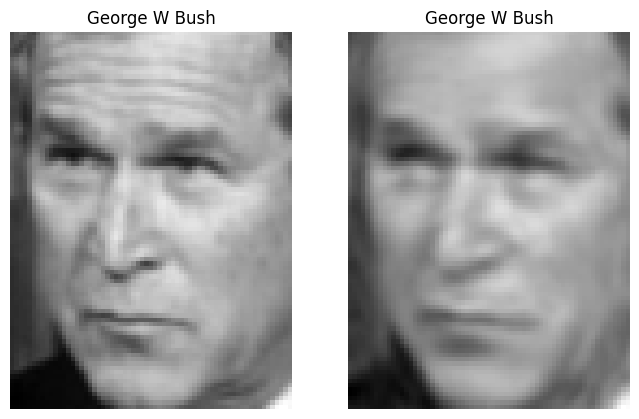

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(121)
plt.imshow(X_train[2].reshape(87,65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87,65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

#Face Verification

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
soekarno1 = plt.imread('data/sample_faces/soekarno1.png').reshape(1,-1)
soekarno2 = plt.imread('data/sample_faces/soekarno2.png').reshape(1,-1)
hatta = plt.imread('data/sample_faces/hatta.png').reshape(1,-1)

In [ ]:
pca.transform(soekarno1).shape

(1, 250)

In [ ]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [ ]:
cosine_similarity(h1, s2)

array([[0.99976801]])

Find similar faces

In [ ]:
sim = cosine_similarity(s2, X_train_pca)

In [ ]:
sim.argsort()

array([[1092,  955, 1446, ..., 2233, 2262, 1987]])

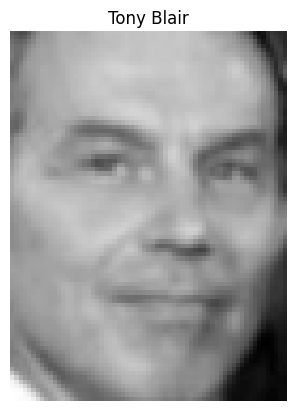

In [ ]:
idx=1092
plt.imshow(X_train[idx].reshape(87,65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off');

#Non Negative Factorization

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


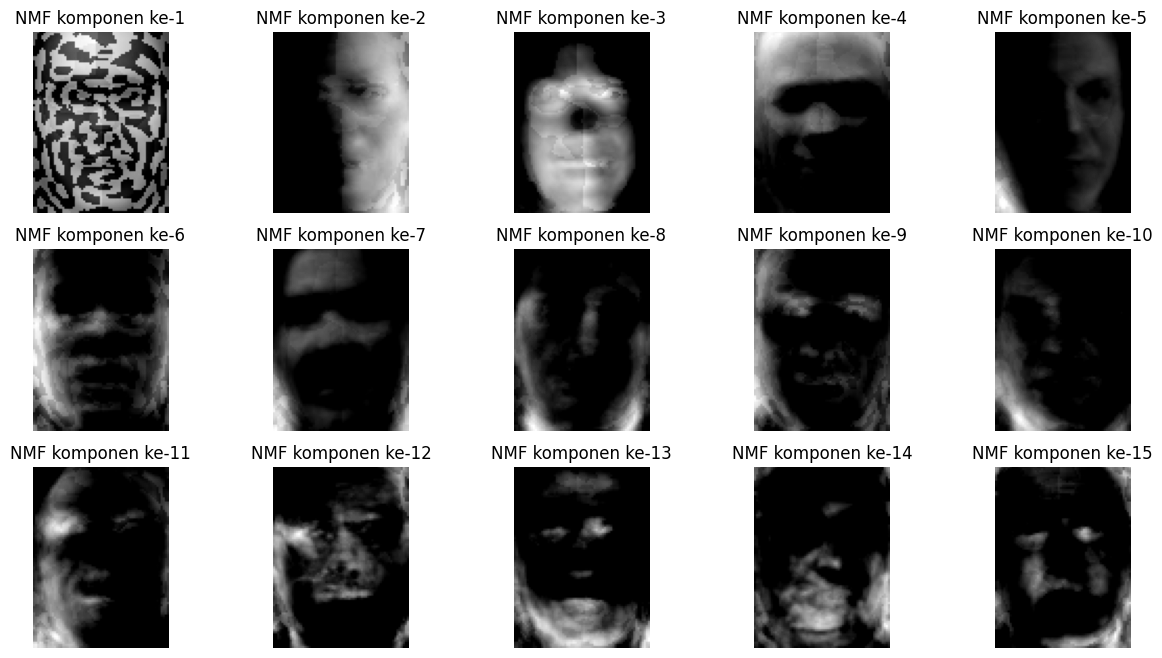

In [ ]:
nmf = NMF(250)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

plt.figure(figsize=(15,8))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(nmf.components_[i].reshape(87,65), cmap='gray')
  plt.title(f'NMF komponen ke-{i+1}')
  plt.axis('off');

In [ ]:
s1 = nmf.transform(soekarno1.astype(np.float64))  # Convert data type to match X_train
s2 = nmf.transform(soekarno2.astype(np.float64))
h1 = nmf.transform(hatta.astype(np.float64))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
cosine_similarity(s1, s2)

array([[0.50354641]])

In [ ]:
cosine_similarity(s1, h1)

array([[0.16104883]])